# 잡케어 추천 대회

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#!pip install mljar-supervised 
# 설치하면 런타임 다시 돌려야 해서 제일 상단에 위치

In [ ]:
from supervised.automl import AutoML

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 데이터 불러오기
train = pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/train.csv")
test = pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/test.csv")

D_code = pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/속성_D_코드.csv", index_col = 0).T.to_dict()
H_code = pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/속성_H_코드.csv", index_col = 0).T.to_dict()
L_code = pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/속성_L_코드.csv", index_col = 0).T.to_dict()

In [ ]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [ ]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34


In [ ]:
# 관련 코드들을 한번에 모델 돌리기 위해서
def add_code(df, d_code, h_code, l_code):
    df['person_prefer_d_1_n'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_1_s'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_1_m'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_1_l'] = df['person_prefer_d_1'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_2_n'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_2_s'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_2_m'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_2_l'] = df['person_prefer_d_2'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['person_prefer_d_3_n'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['person_prefer_d_3_s'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['person_prefer_d_3_m'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['person_prefer_d_3_l'] = df['person_prefer_d_3'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    df['contents_attribute_d_n'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 세분류코드'])
    df['contents_attribute_d_s'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 소분류코드'])
    df['contents_attribute_d_m'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 중분류코드'])
    df['contents_attribute_d_l'] = df['contents_attribute_d'].apply(lambda x: d_code[x]['속성 D 대분류코드'])

    # H Code
    df['person_prefer_h_1_l'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_1_m'] = df['person_prefer_h_1'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_2_l'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_2_m'] = df['person_prefer_h_2'].apply(lambda x: h_code[x]['속성 H 중분류코드'])
    
    df['person_prefer_h_3_l'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['person_prefer_h_3_m'] = df['person_prefer_h_3'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    df['contents_attribute_h_l'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 대분류코드'])
    df['contents_attribute_h_m'] = df['contents_attribute_h'].apply(lambda x: h_code[x]['속성 H 중분류코드'])

    # L Code
    df['contents_attribute_l_n'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 세분류코드'])
    df['contents_attribute_l_s'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 소분류코드'])
    df['contents_attribute_l_m'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 중분류코드'])
    df['contents_attribute_l_l'] = df['contents_attribute_l'].apply(lambda x: l_code[x]['속성 L 대분류코드'])

    drop_column = ['person_prefer_d_1','person_prefer_d_2','person_prefer_d_3','person_prefer_h_1','person_prefer_h_2','person_prefer_h_3','contents_attribute_l']

    for i in drop_column:
        df = df.drop(i, axis = 1)
    return df

train_data = add_code(train, D_code, H_code, L_code)
test_data = add_code(test, D_code, H_code, L_code)

print(train_data.shape)
print(test_data.shape)

(501951, 56)
(46404, 55)


## 속성 코드 이해하기 D, H, L

In [ ]:
D_code = pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/속성_D_코드.csv")
H_code = pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/속성_H_코드.csv")
L_code = pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/속성_L_코드.csv")

### contents_open_dt

In [ ]:
# contents_open_dt를 년, 월, 일, 시간으로 나누자.
def date_time(df, columns = 'contents_open_dt'):

    df[columns] = pd.to_datetime(df[columns])
    df['year'] = df[columns].dt.year
    df['month'] = df[columns].dt.month
    df['day'] = df[columns].dt.day
    df['hour'] = df[columns].dt.hour
    df['weekday'] = df[columns].apply(lambda x: x.weekday())
    df['weekend'] = df['weekday'].copy()
    df['weekday'] = df['weekday'].apply(lambda x:1 if x>4 else 0)
    df['date'] = df[columns].dt.date

    return df

train_data = date_time(train_data)
test_data = date_time(test_data)

In [ ]:
train_data.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_e,person_prefer_f,person_prefer_g,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l,year,month,day,hour,weekday,weekend,date
0,0,True,True,True,False,False,False,1,4,3,5,8,1,1,3,3,10,2,1,2,275,1,4,139,618822,354805,2020-01-17 12:09:36,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1607,1606,1605,2016,2020,1,17,12,0,4,2020-01-17
1,1,False,False,False,True,True,False,1,3,4,1,4,1,1,1,3,5,1,1,2,275,1,4,133,571659,346213,2020-06-18 17:48:52,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,1607,1606,1605,2016,2020,6,18,17,0,3,2020-06-18
2,2,False,False,False,True,False,False,2,0,3,5,3,1,1,3,1,10,2,1,1,94,1,4,53,399816,206408,2020-07-08 20:00:10,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,1599,1595,1572,2016,2020,7,8,20,0,2,2020-07-08
3,3,False,False,False,True,False,False,2,0,2,5,3,1,1,1,3,5,1,1,2,275,5,3,74,827967,572323,2020-01-13 18:09:34,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1607,1606,1605,2016,2020,1,13,18,0,0,2020-01-13
4,4,True,True,True,False,False,False,1,3,4,5,4,1,1,1,1,10,2,1,2,275,1,4,74,831614,573899,2020-03-09 20:39:22,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,1607,1606,1605,2016,2020,3,9,20,0,0,2020-03-09


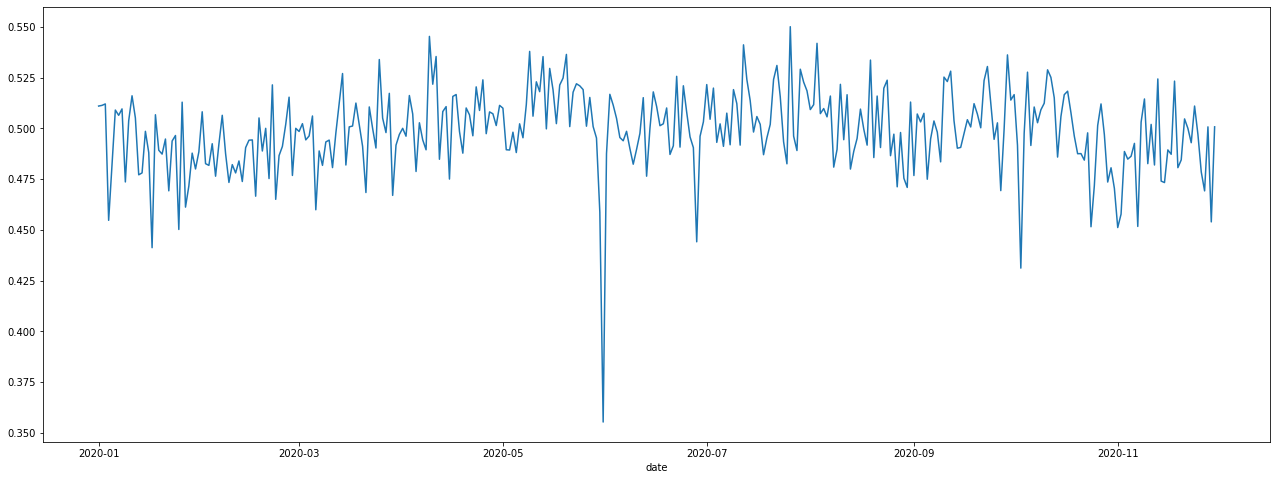

In [ ]:
## date를 이용하여 점점 늘어나는지 확인해보자.
plot_data = train_data.groupby('date')['target'].mean()
plot_data
plt.figure(figsize = (22,8))
sns.lineplot(data = plot_data, x = plot_data.index, y = plot_data.values)

## 2020.05.31을 줄이니 더 좋은 성과를 낸다.

In [ ]:
## 우리가 확인해봐야할 것
## 평일에 공휴일인 곳을 바꿔줘야 한다.
## 왜 저 날은 내려갔을까?
## 중복 제거를 해야할 것 같은데 그 부분도 한번 계속 확인해보자.

In [ ]:
for i in plot_data.index:
    if plot_data[i] < 0.4:
        print(i)

## 왜 이 날짜만 적게 나타났을까?
# train_data[train_data['date'] == datetime.date(2020, 5, 31)]

delete_index = train_data[train_data['date'] == datetime.date(2020, 5, 31)].index

train_data = train_data.drop(delete_index, axis = 0)

train_data = train_data.reset_index(drop = True)

2020-05-31


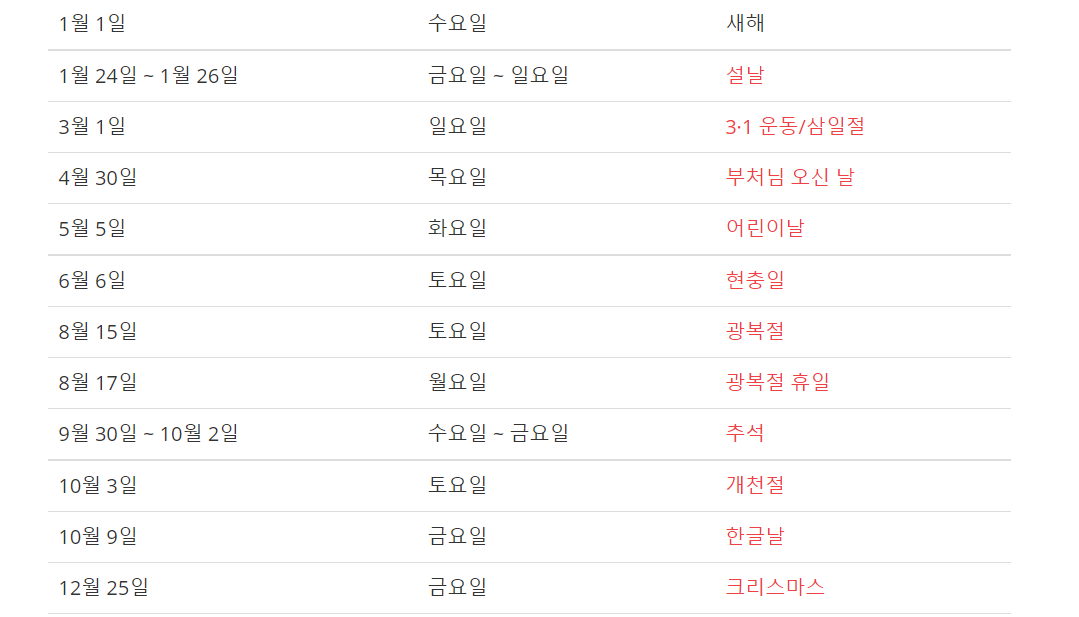

In [ ]:
## 평일인데 공휴일인 부분은 주말로 변경해주자.
train_data['date'] = train_data['date'].apply(lambda x:str(x))

change_date = ['2020-01-01', '2020-01-24', '2020-04-30','2020-05-05','2020-08-17', '2020-09-30','2020-10-01','2020-10-02','2020-10-09','2020-12-25']

for i in train_data.index:
    if train_data.loc[i, 'date'] in change_date:

        train_data.loc[i,'weekday'] = 1
        train_data.loc[i,'weekend'] = 6

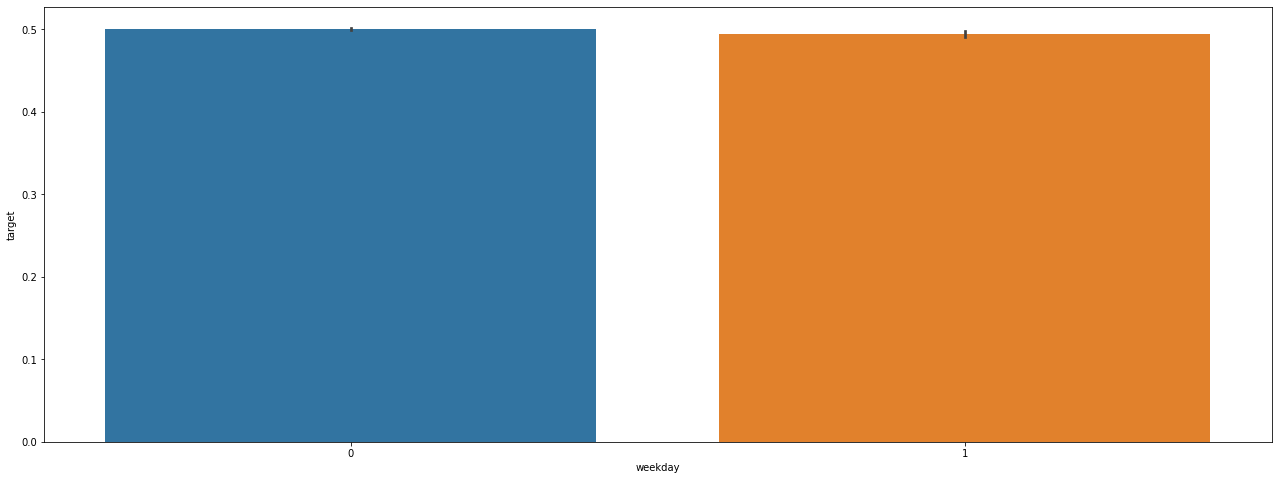

In [ ]:
# ??? 영향이 없나...? ㅎㅎ
plt.figure(figsize = (22,8))
sns.barplot(data = train_data, x = 'weekday', y = 'target')

### D,H,L 데이터 target 평균값으로 mapping 해주기

In [ ]:
## groupby 해야하는 것 전부!!!
def D_H_L_mapping(train = None, test = None):
    
    ## D_1_code
    person_prefer_d_1_l = train.groupby('person_prefer_d_1_l')['target'].mean()
    train['person_prefer_d_1_l'] = train['person_prefer_d_1_l'].map({i:j for i, j in zip(person_prefer_d_1_l.keys(), person_prefer_d_1_l.values)})
    test['person_prefer_d_1_l'] = test['person_prefer_d_1_l'].map({i:j for i, j in zip(person_prefer_d_1_l.keys(), person_prefer_d_1_l.values)})

    person_prefer_d_1_n = train.groupby('person_prefer_d_1_n')['target'].mean()
    train['person_prefer_d_1_n'] = train['person_prefer_d_1_n'].map({i:j for i, j in zip(person_prefer_d_1_n.keys(), person_prefer_d_1_n.values)})
    test['person_prefer_d_1_n'] = test['person_prefer_d_1_n'].map({i:j for i, j in zip(person_prefer_d_1_n.keys(), person_prefer_d_1_n.values)})


    person_prefer_d_1_m = train.groupby('person_prefer_d_1_m')['target'].mean()
    train['person_prefer_d_1_m'] = train['person_prefer_d_1_m'].map({i:j for i, j in zip(person_prefer_d_1_m.keys(), person_prefer_d_1_m.values)})
    test['person_prefer_d_1_m'] = test['person_prefer_d_1_m'].map({i:j for i, j in zip(person_prefer_d_1_m.keys(), person_prefer_d_1_m.values)})
    
    person_prefer_d_1_s = train.groupby('person_prefer_d_1_s')['target'].mean()
    train['person_prefer_d_1_s'] = train['person_prefer_d_1_s'].map({i:j for i, j in zip(person_prefer_d_1_s.keys(), person_prefer_d_1_s.values)})
    test['person_prefer_d_1_s'] = test['person_prefer_d_1_s'].map({i:j for i, j in zip(person_prefer_d_1_s.keys(), person_prefer_d_1_s.values)})

    ## D_2_code
    person_prefer_d_2_l = train.groupby('person_prefer_d_2_l')['target'].mean()
    train['person_prefer_d_2_l'] = train['person_prefer_d_2_l'].map({i:j for i, j in zip(person_prefer_d_2_l.keys(), person_prefer_d_2_l.values)})
    test['person_prefer_d_2_l'] = test['person_prefer_d_2_l'].map({i:j for i, j in zip(person_prefer_d_2_l.keys(), person_prefer_d_2_l.values)})

    person_prefer_d_2_n = train.groupby('person_prefer_d_2_n')['target'].mean()
    train['person_prefer_d_2_n'] = train['person_prefer_d_2_n'].map({i:j for i, j in zip(person_prefer_d_2_n.keys(), person_prefer_d_2_n.values)})
    test['person_prefer_d_2_n'] = test['person_prefer_d_2_n'].map({i:j for i, j in zip(person_prefer_d_2_n.keys(), person_prefer_d_2_n.values)})
    
    person_prefer_d_2_m = train.groupby('person_prefer_d_2_m')['target'].mean()
    train['person_prefer_d_2_m'] = train['person_prefer_d_2_m'].map({i:j for i, j in zip(person_prefer_d_2_m.keys(), person_prefer_d_2_m.values)})
    test['person_prefer_d_2_m'] = test['person_prefer_d_2_m'].map({i:j for i, j in zip(person_prefer_d_2_m.keys(), person_prefer_d_2_m.values)})

    person_prefer_d_2_s = train.groupby('person_prefer_d_2_s')['target'].mean()
    train['person_prefer_d_2_s'] = train['person_prefer_d_2_s'].map({i:j for i, j in zip(person_prefer_d_2_s.keys(), person_prefer_d_2_s.values)})
    test['person_prefer_d_2_s'] = test['person_prefer_d_2_s'].map({i:j for i, j in zip(person_prefer_d_2_s.keys(), person_prefer_d_2_s.values)})

    ## D_3_code
    person_prefer_d_3_l = train.groupby('person_prefer_d_3_l')['target'].mean()
    train['person_prefer_d_3_l'] = train['person_prefer_d_3_l'].map({i:j for i, j in zip(person_prefer_d_3_l.keys(), person_prefer_d_3_l.values)})
    test['person_prefer_d_3_l'] = test['person_prefer_d_3_l'].map({i:j for i, j in zip(person_prefer_d_3_l.keys(), person_prefer_d_3_l.values)})

    person_prefer_d_3_n = train.groupby('person_prefer_d_3_n')['target'].mean()
    train['person_prefer_d_3_n'] = train['person_prefer_d_3_n'].map({i:j for i, j in zip(person_prefer_d_3_n.keys(), person_prefer_d_3_n.values)})
    test['person_prefer_d_3_n'] = test['person_prefer_d_3_n'].map({i:j for i, j in zip(person_prefer_d_3_n.keys(), person_prefer_d_3_n.values)})
    
    person_prefer_d_3_m = train.groupby('person_prefer_d_3_m')['target'].mean()
    train['person_prefer_d_3_m'] = train['person_prefer_d_3_m'].map({i:j for i, j in zip(person_prefer_d_3_m.keys(), person_prefer_d_3_m.values)})
    test['person_prefer_d_3_m'] = test['person_prefer_d_3_m'].map({i:j for i, j in zip(person_prefer_d_3_m.keys(), person_prefer_d_3_m.values)})

    person_prefer_d_3_s = train.groupby('person_prefer_d_3_s')['target'].mean()
    train['person_prefer_d_3_s'] = train['person_prefer_d_3_s'].map({i:j for i, j in zip(person_prefer_d_3_s.keys(), person_prefer_d_3_s.values)})
    test['person_prefer_d_3_s'] = test['person_prefer_d_3_s'].map({i:j for i, j in zip(person_prefer_d_3_s.keys(), person_prefer_d_3_s.values)})
    
    ## contents_d
    contents_attribute_d_l = train.groupby('contents_attribute_d_l')['target'].mean()
    train['contents_attribute_d_l'] = train['contents_attribute_d_l'].map({i:j for i, j in zip(contents_attribute_d_l.keys(), contents_attribute_d_l.values)})
    test['contents_attribute_d_l'] = test['contents_attribute_d_l'].map({i:j for i, j in zip(contents_attribute_d_l.keys(), contents_attribute_d_l.values)})

    contents_attribute_d_m = train.groupby('contents_attribute_d_m')['target'].mean()
    train['contents_attribute_d_m'] = train['contents_attribute_d_m'].map({i:j for i, j in zip(contents_attribute_d_m.keys(), contents_attribute_d_m.values)})
    test['contents_attribute_d_m'] = test['contents_attribute_d_m'].map({i:j for i, j in zip(contents_attribute_d_m.keys(), contents_attribute_d_m.values)})

    contents_attribute_d_n = train.groupby('contents_attribute_d_n')['target'].mean()
    train['contents_attribute_d_n'] = train['contents_attribute_d_n'].map({i:j for i, j in zip(contents_attribute_d_n.keys(), contents_attribute_d_n.values)})
    test['contents_attribute_d_n'] = test['contents_attribute_d_n'].map({i:j for i, j in zip(contents_attribute_d_n.keys(), contents_attribute_d_n.values)})

    contents_attribute_d_s = train.groupby('contents_attribute_d_s')['target'].mean()
    train['contents_attribute_d_s'] = train['contents_attribute_d_s'].map({i:j for i, j in zip(contents_attribute_d_s.keys(), contents_attribute_d_s.values)})
    test['contents_attribute_d_s'] = test['contents_attribute_d_s'].map({i:j for i, j in zip(contents_attribute_d_s.keys(), contents_attribute_d_s.values)})

    ## H_1_code
    person_prefer_h_1_l = train.groupby('person_prefer_h_1_l')['target'].mean()
    train['person_prefer_h_1_l'] = train['person_prefer_h_1_l'].map({i:j for i, j in zip(person_prefer_h_1_l.keys(), person_prefer_h_1_l.values)})
    test['person_prefer_h_1_l'] = test['person_prefer_h_1_l'].map({i:j for i, j in zip(person_prefer_h_1_l.keys(), person_prefer_h_1_l.values)})
    
    person_prefer_h_1_m = train.groupby('person_prefer_h_1_m')['target'].mean()
    train['person_prefer_h_1_m'] = train['person_prefer_h_1_m'].map({i:j for i, j in zip(person_prefer_h_1_m.keys(), person_prefer_h_1_m.values)})
    test['person_prefer_h_1_m'] = test['person_prefer_h_1_m'].map({i:j for i, j in zip(person_prefer_h_1_m.keys(), person_prefer_h_1_m.values)})

    ## H_2_code
    person_prefer_h_2_l = train.groupby('person_prefer_h_2_l')['target'].mean()
    train['person_prefer_h_2_l'] = train['person_prefer_h_2_l'].map({i:j for i, j in zip(person_prefer_h_2_l.keys(), person_prefer_h_2_l.values)})
    test['person_prefer_h_2_l'] = test['person_prefer_h_2_l'].map({i:j for i, j in zip(person_prefer_h_2_l.keys(), person_prefer_h_2_l.values)})

    person_prefer_h_2_m = train.groupby('person_prefer_h_2_m')['target'].mean()
    train['person_prefer_h_2_m'] = train['person_prefer_h_2_m'].map({i:j for i, j in zip(person_prefer_h_2_m.keys(), person_prefer_h_2_m.values)})
    test['person_prefer_h_2_m'] = test['person_prefer_h_2_m'].map({i:j for i, j in zip(person_prefer_h_2_m.keys(), person_prefer_h_2_m.values)})

    ## H_3_code
    person_prefer_h_3_l = train.groupby('person_prefer_h_3_l')['target'].mean()
    train['person_prefer_h_3_l'] = train['person_prefer_h_3_l'].map({i:j for i, j in zip(person_prefer_h_3_l.keys(), person_prefer_h_3_l.values)})
    test['person_prefer_h_3_l'] = test['person_prefer_h_3_l'].map({i:j for i, j in zip(person_prefer_h_3_l.keys(), person_prefer_h_3_l.values)})

    person_prefer_h_3_m = train.groupby('person_prefer_h_3_m')['target'].mean()
    train['person_prefer_h_3_m'] = train['person_prefer_h_3_m'].map({i:j for i, j in zip(person_prefer_h_3_m.keys(), person_prefer_h_3_m.values)})
    test['person_prefer_h_3_m'] = test['person_prefer_h_3_m'].map({i:j for i, j in zip(person_prefer_h_3_m.keys(), person_prefer_h_3_m.values)})

    ## contents_H
    contents_attribute_h_l = train.groupby('contents_attribute_h_l')['target'].mean()
    train['contents_attribute_h_l'] = train['contents_attribute_h_l'].map({i:j for i, j in zip(contents_attribute_h_l.keys(), contents_attribute_h_l.values)})
    test['contents_attribute_h_l'] = test['contents_attribute_h_l'].map({i:j for i, j in zip(contents_attribute_h_l.keys(), contents_attribute_h_l.values)})

    contents_attribute_h_m = train.groupby('contents_attribute_h_m')['target'].mean()
    train['contents_attribute_h_m'] = train['contents_attribute_h_m'].map({i:j for i, j in zip(contents_attribute_h_m.keys(), contents_attribute_h_m.values)})
    test['contents_attribute_h_m'] = test['contents_attribute_h_m'].map({i:j for i, j in zip(contents_attribute_h_m.keys(), contents_attribute_h_m.values)})

    ## L_code
    contents_attribute_l_n = train.groupby('contents_attribute_l_n')['target'].mean()
    train['contents_attribute_l_n'] = train['contents_attribute_l_n'].map({i:j for i, j in zip(contents_attribute_l_n.keys(), contents_attribute_l_n.values)})
    test['contents_attribute_l_n'] = test['contents_attribute_l_n'].map({i:j for i, j in zip(contents_attribute_l_n.keys(), contents_attribute_l_n.values)})
    
    contents_attribute_l_s = train.groupby('contents_attribute_l_s')['target'].mean()
    train['contents_attribute_l_s'] = train['contents_attribute_l_s'].map({i:j for i, j in zip(contents_attribute_l_s.keys(), contents_attribute_l_s.values)})
    test['contents_attribute_l_s'] = test['contents_attribute_l_s'].map({i:j for i, j in zip(contents_attribute_l_s.keys(), contents_attribute_l_s.values)})

    contents_attribute_l_m = train.groupby('contents_attribute_l_m')['target'].mean()
    train['contents_attribute_l_m'] = train['contents_attribute_l_m'].map({i:j for i, j in zip(contents_attribute_l_m.keys(), contents_attribute_l_m.values)})
    test['contents_attribute_l_m'] = test['contents_attribute_l_m'].map({i:j for i, j in zip(contents_attribute_l_m.keys(), contents_attribute_l_m.values)})

    contents_attribute_l_l = train.groupby('contents_attribute_l_l')['target'].mean()
    train['contents_attribute_l_l'] = train['contents_attribute_l_l'].map({i:j for i, j in zip(contents_attribute_l_l.keys(), contents_attribute_l_l.values)})
    test['contents_attribute_l_l'] = test['contents_attribute_l_l'].map({i:j for i, j in zip(contents_attribute_l_l.keys(), contents_attribute_l_l.values)})

    return train, test

In [ ]:
train_data, test_data = D_H_L_mapping(train = train_data, test = test_data)

### True False 되어있는 부분 대분류만 처리해주기

In [ ]:
## 이 방법을 사용하려고 했지만 데이터를 살펴본 결과 시작 데이터부터 이상이 생겨서 안하도록 하자.
# from tqdm import tqdm
# def True_False_change(data = None, columns = None, match = None):
#     for i in tqdm(data.index):
#         if data.loc[i,match] == False:
#             for j in columns:
#                 data.loc[i,j] = 99999
#     return data

# # 이 부분은 나중에 한번 더 추가하여 모델 돌려보기~
# train_data = True_False_change(data = train_data, columns = ['person_prefer_d_1_l', 'contents_attribute_d_l'], match = 'd_l_match_yn')
# train_data = True_False_change(data = train_data, columns = ['person_prefer_h_1_l', 'contents_attribute_h_l'], match = 'h_l_match_yn')


# test_data = True_False_change(data = test_data, columns = ['person_prefer_d_1_l', 'contents_attribute_d_l'], match = 'd_l_match_yn')
# test_data = True_False_change(data = test_data, columns = ['person_prefer_h_1_l', 'contents_attribute_h_l'], match = 'h_l_match_yn')

### E데이터 살펴보기

In [ ]:
## 아무 연관이 없다.
# for i in train_data['person_prefer_e'].unique():
#     plt.figure(figsize = (22,8))
#     sns.barplot(data = train_data[train_data['person_prefer_e'] == i], x = 'contents_attribute_e', y = 'target')
#     plt.title(f'person_prefer_e : {i}')
#     plt.show()

## Modeling

In [ ]:
## 1. weekend에서 train과 test에 차이가 있다고 판단함 -->> weekend를 변수로 추가해보자.
## 2. hour의 차이가 없다면? -->  제거해보고 모델 확인해 보기

In [ ]:
train_data.columns

Index(['id', 'd_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_e', 'person_prefer_f', 'person_prefer_g',
       'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_d',
       'contents_attribute_m', 'contents_attribute_e', 'contents_attribute_h',
       'person_rn', 'contents_rn', 'contents_open_dt', 'target',
       'person_prefer_d_1_n', 'person_prefer_d_1_s', 'person_prefer_d_1_m',
       'person_prefer_d_1_l', 'person_prefer_d_2_n', 'person_prefer_d_2_s',
       'person_prefer_d_2_m', 'person_prefer_d_2_l', 'person_prefer_d_3_n',
       'person_prefer_d_3_s', 'person_prefer_d_3_m', 'person_prefer_d_3_l',
       'contents_attribute_d_n', 'contents_attribute_d_s',
       'contents_attribute_d

In [ ]:
## Github에 보면 person_attribute_a와 person_attribute_a_1의 값을 비교해 봤을 때 두 개의 변수가 다 필요하다고 생각된다.
## 변수를 추출하며 확인해 보자.
dummy_column = ['weekend','person_attribute_a_1', 'person_attribute_b','person_prefer_c','person_prefer_e','contents_attribute_j_1','contents_attribute_c','contents_attribute_m','contents_attribute_e']
drop_column = ['id','person_rn','contents_rn','contents_open_dt','year','month','day','weekday','hour','date','contents_attribute_j','person_prefer_f','person_prefer_g','d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn','contents_attribute_d','contents_attribute_h']

final_train = train_data.drop(drop_column, axis = 1)
final_test = test_data.drop(drop_column, axis = 1)

############### 만약에 중분류를 사용한다면? ##########################
# print(final_train.shape, final_test.shape)
# final_concat = pd.concat([final_train, final_test], axis = 0)
# final_data = pd.get_dummies(data = final_concat, columns = dummy_column)

# final_train = final_data.iloc[:501951,:]
# final_test = final_data.iloc[501951:,:].drop('target', axis = 1)

# print(final_train.shape, final_test.shape)
######################################################################

# # # train에만 존재하는 변수가 있기 때문에
final_train = pd.get_dummies(data = final_train, columns = dummy_column, drop_first = True)
final_test = pd.get_dummies(data = final_test, columns = dummy_column, drop_first = True)

In [ ]:
print('train_data shape :', final_train.shape)
print('test_data shape :', final_test.shape)

train_data shape : (501374, 92)
test_data shape : (46404, 91)


In [ ]:
for i in set(final_train.columns):
    if i in final_test.columns:
        pass
    else:
        print(i)

target


In [ ]:
final_train.columns

Index(['person_attribute_a', 'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_k', 'target', 'person_prefer_d_1_n',
       'person_prefer_d_1_s', 'person_prefer_d_1_m', 'person_prefer_d_1_l',
       'person_prefer_d_2_n', 'person_prefer_d_2_s', 'person_prefer_d_2_m',
       'person_prefer_d_2_l', 'person_prefer_d_3_n', 'person_prefer_d_3_s',
       'person_prefer_d_3_m', 'person_prefer_d_3_l', 'contents_attribute_d_n',
       'contents_attribute_d_s', 'contents_attribute_d_m',
       'contents_attribute_d_l', 'person_prefer_h_1_l', 'person_prefer_h_1_m',
       'person_prefer_h_2_l', 'person_prefer_h_2_m', 'person_prefer_h_3_l',
       'person_prefer_h_3_m', 'contents_attribute_h_l',
       'contents_attribute_h_m', 'contents_attribute_l_n',
       'contents_attribute_l_s', 'contents_attribute_l_m',
       'contents_attribute_l_l', 'weekend_1', 'weekend_2', 'weekend_3',
       'weekend_4', 'weekend_5', 'weekend_6', 'person_attribute_a_1_1',
       'person_attri

In [ ]:
# # 중요 변수를 추출하기 위해서 statsmodels로 변수들의 P-value를 확인한다.
import statsmodels.api as sm

X = sm.add_constant(final_train.drop('target', axis = 1))
y = final_train['target']

model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     287.0
Date:                Thu, 27 Jan 2022   Prob (F-statistic):               0.00
Time:                        04:25:49   Log-Likelihood:            -3.5116e+05
No. Observations:              501374   AIC:                         7.025e+05
Df Residuals:                  501282   BIC:                         7.035e+05
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [ ]:
## 나중에 P-value를 통해서 변수 제거를 시도해 보자.
X = sm.add_constant(final_train.drop('target', axis = 1))
model = sm.Logit(final_train['target'], X)
results = model.fit()

print(results.summary())

Optimization terminated successfully.
         Current function value: 0.667158
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:               501374
Model:                          Logit   Df Residuals:                   501282
Method:                           MLE   Df Model:                           91
Date:                Thu, 27 Jan 2022   Pseudo R-squ.:                 0.03749
Time:                        04:25:59   Log-Likelihood:            -3.3450e+05
converged:                       True   LL-Null:                   -3.4753e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -5.8699      0.360    -16.324      0.000      -6.

In [ ]:
final_test.columns

Index(['person_attribute_a', 'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_k', 'person_prefer_d_1_n', 'person_prefer_d_1_s',
       'person_prefer_d_1_m', 'person_prefer_d_1_l', 'person_prefer_d_2_n',
       'person_prefer_d_2_s', 'person_prefer_d_2_m', 'person_prefer_d_2_l',
       'person_prefer_d_3_n', 'person_prefer_d_3_s', 'person_prefer_d_3_m',
       'person_prefer_d_3_l', 'contents_attribute_d_n',
       'contents_attribute_d_s', 'contents_attribute_d_m',
       'contents_attribute_d_l', 'person_prefer_h_1_l', 'person_prefer_h_1_m',
       'person_prefer_h_2_l', 'person_prefer_h_2_m', 'person_prefer_h_3_l',
       'person_prefer_h_3_m', 'contents_attribute_h_l',
       'contents_attribute_h_m', 'contents_attribute_l_n',
       'contents_attribute_l_s', 'contents_attribute_l_m',
       'contents_attribute_l_l', 'weekend_1', 'weekend_2', 'weekend_3',
       'weekend_4', 'weekend_5', 'weekend_6', 'person_attribute_a_1_1',
       'person_attribute_a_1_2

# AutoML

score: 0.6965388764

In [ ]:
automl=AutoML(total_time_limit=18000, mode="Compete", ml_task='regression', eval_metric='rmse',
              algorithms=['Random Forest','Extra Trees','LightGBM','Xgboost','CatBoost'],
              validation_strategy={"validation_type":"kfold", "k_folds":10, "shuffle":True,
                                   "stratify":True, "random_seed":1234},
              boost_on_errors=True, kmeans_features=True)

In [ ]:
x=final_train.drop('target',axis=1)
y=final_train['target']

In [ ]:
automl.fit(x,y)

AutoML directory: AutoML_2
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'kmeans_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 5 models
1_Default_LightGBM rmse 0.473074 trained in 2425.32 seconds
2_Default_Xgboost rmse 0.47331 trained in 2915.98 seconds
* Step not_so_random will try to check up to 45 models
12_LightGBM rmse 0.474431 trained in 3396.97 seconds
3_Xgboost rmse 0.4728 trained in 1923.06 seconds
Skip golden_features because no parameters were generated.
'score' Traceback (most recent call last):
  File "

AutoML(algorithms=['Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost',
                   'CatBoost'],
       boost_on_errors=True, eval_metric='rmse', kmeans_features=True,
       ml_task='regression', mode='Compete', total_time_limit=18000,
       validation_strategy={'k_folds': 10, 'random_seed': 1234, 'shuffle': True,
                            'stratify': True, 'validation_type': 'kfold'})

In [ ]:
pred=automl.predict(final_test)

In [ ]:
df_pred=pd.DataFrame(pred, columns=['target'])
df_pred['target']=df_pred['target'].apply(lambda x:1 if x>=0.35 else 0)

In [ ]:
sub_1=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/sample_submission.csv")

In [ ]:
sub=sub_1.drop('target',axis=1)
sub_mljar_f=pd.concat([sub, df_pred], axis=1)

In [ ]:
def only_pie_chart(df):
  zero=len(df.loc[df['target']==0].index)
  one=len(df.loc[df['target']==1].index)
  ratio=[zero, one]
  labels=['target_0', 'target_1']
  plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)
  plt.show()

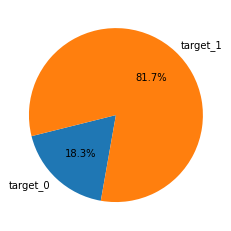

In [ ]:
only_pie_chart(sub_mljar_f)

In [ ]:
sub_mljar_f['target'].value_counts()

1    37900
0     8504
Name: target, dtype: int64

In [ ]:
sub_mljar_f.to_csv("/content/drive/MyDrive/데이콘/Jobcare_data/sub_mljar_f.csv", index=False)

In [ ]:
sub_mljar_f.to_csv('sub_mljar_f.csv', index=False)

# Noise Data + AutoML

Make Noise Data
--

먼저, train 데이터에서 타겟이 0인 많은 데이터와 1이 많은 데이터를 만들어 준다.

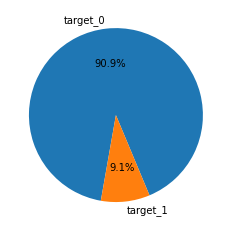

In [ ]:
from sklearn.model_selection import train_test_split
df_0=final_train.loc[final_train['target']==0]
df_1=final_train.loc[final_train['target']==1]
df_1_drop, df_11=train_test_split(df_1, test_size=0.1, random_state=42)
df_11=df_11.reset_index()
df_1=df_1.reset_index()
train_0=pd.concat([df_0, df_11], axis=0)
train_0=train_0.sort_values('index', ascending=True)
train_0.drop('index', axis=1, inplace=True)
zero=len(train_0.loc[train_0['target']==0].index)
one=len(train_0.loc[train_0['target']==1].index)
ratio=[zero, one]
labels=['target_0', 'target_1']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

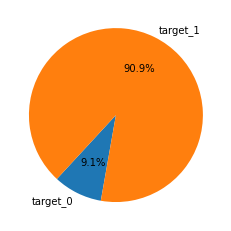

In [ ]:
df_0=final_train.loc[final_train['target']==0]
df_1=final_train.loc[final_train['target']==1]
df_0_drop, df_00=train_test_split(df_0, test_size=0.1, random_state=42)
df_00=df_00.reset_index()
df_1=df_1.reset_index()
train_1=pd.concat([df_1, df_00], axis=0)
train_1=train_1.sort_values('index', ascending=True)
train_1.drop('index', axis=1, inplace=True)
zero=len(train_1.loc[train_1['target']==0].index)
one=len(train_1.loc[train_1['target']==1].index)
ratio=[zero, one]
labels=['target_0', 'target_1']
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

In [ ]:
train_0=train_0.reset_index()
train_1=train_1.reset_index()

이제 불균형해진 train_0과 train_1의 데이터에서 불균형한 데이터를 SMOTE를 사용하여 Oversampling 해준다.

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=0)

def make_over_sampling(df):
  x=df.drop('target', axis=1)
  y=df[['target']]
  x, y=sm.fit_resample(x, y)
  new_df=pd.concat([x,y], axis=1)
  return new_df

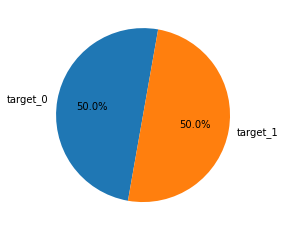

In [ ]:
new_train_0=make_over_sampling(train_0)
only_pie_chart(new_train_0)

- target이 1인 데이터 생성

In [ ]:
new_train_0.drop('index', axis=1, inplace=True)

In [ ]:
new_train_0.iloc[:, -1]

0         1
1         1
2         1
3         1
4         1
         ..
501463    1
501464    1
501465    1
501466    1
501467    1
Name: target, Length: 501468, dtype: int64

In [ ]:
from tqdm import tqdm

for i in tqdm(range(len(new_train_0.index))):
  if new_train_0.iloc[i, -1]==1:
    new_train_0.iloc[i, -1]=0
  else:
    new_train_0.iloc[i, -1]=1

100%|██████████| 501468/501468 [17:18<00:00, 482.74it/s]


- 새로 만들어진 데이터는 1과 유사한 특성을 갖는 데이터지만, 의도적으로 타겟을 0으로 바꾸어 주어 Noise 데이터를 만들어 준다.

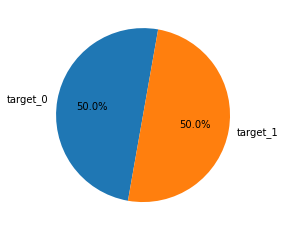

In [ ]:
new_train_1=make_over_sampling(train_1)
only_pie_chart(new_train_1)

- target이 0인 데이터 생성

In [ ]:
new_train_1.drop('index', axis=1, inplace=True)

In [ ]:
for i in tqdm(range(len(new_train_1.index))):
  if new_train_1.iloc[i, -1]==0:
    new_train_1.iloc[i, -1]=1
  else:
    new_train_1.iloc[i, -1]=0

100%|██████████| 501280/501280 [17:05<00:00, 488.77it/s]


In [ ]:
new_train_1.head()

,person_attribute_a,contents_attribute_i,contents_attribute_a,contents_attribute_k,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l,weekend_1,weekend_2,weekend_3,weekend_4,weekend_5,weekend_6,person_attribute_a_1_1,person_attribute_a_1_2,...,person_prefer_c_4,person_prefer_c_5,person_prefer_e_1,person_prefer_e_2,person_prefer_e_3,person_prefer_e_4,person_prefer_e_5,person_prefer_e_6,person_prefer_e_7,person_prefer_e_8,person_prefer_e_9,person_prefer_e_10,person_prefer_e_11,contents_attribute_j_1_2,contents_attribute_j_1_3,contents_attribute_j_1_4,contents_attribute_j_1_5,contents_attribute_j_1_6,contents_attribute_j_1_8,contents_attribute_j_1_9,contents_attribute_j_1_10,contents_attribute_c_2,contents_attribute_c_3,contents_attribute_c_4,contents_attribute_m_2,contents_attribute_m_3,contents_attribute_m_4,contents_attribute_m_5,contents_attribute_e_1,contents_attribute_e_2,contents_attribute_e_3,contents_attribute_e_4,contents_attribute_e_5,contents_attribute_e_6,contents_attribute_e_7,contents_attribute_e_8,contents_attribute_e_9,contents_attribute_e_10,contents_attribute_e_11,target
0,1,3,3,2,0.556190,0.566065,0.566065,0.536111,0.513164,0.513957,0.524891,0.544153,0.538438,0.538438,0.526326,0.534354,0.416667,0.487569,0.487569,0.478069,0.577171,0.573100,0.511813,0.542107,0.545914,0.558835,0.503260,0.463142,0.497276,0.507087,0.509782,0.556686,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,3,3,2,0.480319,0.486509,0.505553,0.509151,0.490558,0.492380,0.506452,0.509395,0.498571,0.507336,0.505778,0.507929,0.416667,0.487569,0.487569,0.478069,0.462271,0.463041,0.459282,0.463358,0.482428,0.482428,0.465633,0.499868,0.497276,0.507087,0.509782,0.556686,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,3,1,2,0.516952,0.517536,0.516991,0.536111,0.545650,0.545712,0.524891,0.544153,0.527793,0.529692,0.505778,0.507929,0.416667,0.487569,0.487569,0.478069,0.498396,0.480000,0.511813,0.460341,0.499301,0.496063,0.503260,0.514862,0.497276,0.507087,0.509782,0.556686,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,1,3,1,2,0.469990,0.469272,0.470073,0.468319,0.469659,0.469821,0.471580,0.472232,0.472529,0.472159,0.476537,0.476396,0.452320,0.450322,0.433327,0.470988,0.498396,0.514677,0.511813,0.490099,0.536358,0.511397,0.503260,0.463142,0.505228,0.505228,0.479472,0.505199,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,1,2,3,2,0.479730,0.474880,0.470073,0.468319,0.470975,0.470975,0.470975,0.472232,0.477859,0.478895,0.475271,0.476396,0.462525,0.462525,0.462525,0.470988,0.498396,0.456965,0.511813,0.504327,0.499301,0.478526,0.503260,0.463142,0.505228,0.505228,0.479472,0.505199,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
new_train_0.head()

,person_attribute_a,contents_attribute_i,contents_attribute_a,contents_attribute_k,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l,weekend_1,weekend_2,weekend_3,weekend_4,weekend_5,weekend_6,person_attribute_a_1_1,person_attribute_a_1_2,...,person_prefer_c_4,person_prefer_c_5,person_prefer_e_1,person_prefer_e_2,person_prefer_e_3,person_prefer_e_4,person_prefer_e_5,person_prefer_e_6,person_prefer_e_7,person_prefer_e_8,person_prefer_e_9,person_prefer_e_10,person_prefer_e_11,contents_attribute_j_1_2,contents_attribute_j_1_3,contents_attribute_j_1_4,contents_attribute_j_1_5,contents_attribute_j_1_6,contents_attribute_j_1_8,contents_attribute_j_1_9,contents_attribute_j_1_10,contents_attribute_c_2,contents_attribute_c_3,contents_attribute_c_4,contents_attribute_m_2,contents_attribute_m_3,contents_attribute_m_4,contents_attribute_m_5,contents_attribute_e_1,contents_attribute_e_2,contents_attribute_e_3,contents_attribute_e_4,contents_attribute_e_5,contents_attribute_e_6,contents_attribute_e_7,contents_attribute_e_8,contents_attribute_e_9,contents_attribute_e_10,contents_attribute_e_11,target
0,2,3,1,2,0.532076,0.502364,0.505553,0.509151,0.524964,0.516475,0.506452,0.509395,0.540246,0.506948,0.505778,0.507929,0.532427,0.545923,0.560124,0.557058,0.462271,0.463041,0.459282,0.463358,0.445809,0.451369,0.465633,0.499868,0.547316,0.546729,0.536912,0.527141,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2,1,3,2,0.534536,0.540412,0.550286,0.509151,0.505413,0.502432,0.465635,0.472232,0.527793,0.529692,0.505778,0.507929,0.502261,0.496021,0.508511,0.470988,0.462271,0.463041,0.459282,0.463358,0.482428,0.482428,0.465633,0.499868,0.547316,0.546729,0.536912,0.527141,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,1,1,2,0.460388,0.464446,0.475351,0.468319,0.461473,0.467894,0.479303,0.472232,0.477859,0.478895,0.475271,0.476396,0.446685,0.447867,0.478469,0.470988,0.498396,0.508957,0.511813,0.519575,0.499301,0.496778,0.503260,0.463142,0.470782,0.473168,0.479472,0.505199,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,3,1,2,0.460388,0.464446,0.475351,0.468319,0.461473,0.467894,0.479303,0.472232,0.465938,0.466016,0.475271,0.476396,0.446685,0.447867,0.478469,0.470988,0.472340,0.463632,0.480840,0.486234,0.461963,0.470246,0.471039,0.446376,0.470782,0.473168,0.479472,0.505199,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,3,2,2,0.507725,0.534150,0.506169,0.524827,0.477106,0.500407,0.502656,0.517324,0.473864,0.489575,0.492822,0.515115,0.382299,0.378648,0.394903,0.459591,0.498396,0.509546,0.511813,0.491536,0.499301,0.496778,0.503260,0.463142,0.435714,0.461316,0.402370,0.402370,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
new_train=pd.concat([new_train_1, new_train_0], axis=0)

In [ ]:
new_train

,person_attribute_a,contents_attribute_i,contents_attribute_a,contents_attribute_k,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l,weekend_1,weekend_2,weekend_3,weekend_4,weekend_5,weekend_6,person_attribute_a_1_1,person_attribute_a_1_2,...,person_prefer_c_4,person_prefer_c_5,person_prefer_e_1,person_prefer_e_2,person_prefer_e_3,person_prefer_e_4,person_prefer_e_5,person_prefer_e_6,person_prefer_e_7,person_prefer_e_8,person_prefer_e_9,person_prefer_e_10,person_prefer_e_11,contents_attribute_j_1_2,contents_attribute_j_1_3,contents_attribute_j_1_4,contents_attribute_j_1_5,contents_attribute_j_1_6,contents_attribute_j_1_8,contents_attribute_j_1_9,contents_attribute_j_1_10,contents_attribute_c_2,contents_attribute_c_3,contents_attribute_c_4,contents_attribute_m_2,contents_attribute_m_3,contents_attribute_m_4,contents_attribute_m_5,contents_attribute_e_1,contents_attribute_e_2,contents_attribute_e_3,contents_attribute_e_4,contents_attribute_e_5,contents_attribute_e_6,contents_attribute_e_7,contents_attribute_e_8,contents_attribute_e_9,contents_attribute_e_10,contents_attribute_e_11,target
0,1,3,3,2,0.556190,0.566065,0.566065,0.536111,0.513164,0.513957,0.524891,0.544153,0.538438,0.538438,0.526326,0.534354,0.416667,0.487569,0.487569,0.478069,0.577171,0.573100,0.511813,0.542107,0.545914,0.558835,0.503260,0.463142,0.497276,0.507087,0.509782,0.556686,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,3,3,2,0.480319,0.486509,0.505553,0.509151,0.490558,0.492380,0.506452,0.509395,0.498571,0.507336,0.505778,0.507929,0.416667,0.487569,0.487569,0.478069,0.462271,0.463041,0.459282,0.463358,0.482428,0.482428,0.465633,0.499868,0.497276,0.507087,0.509782,0.556686,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,3,1,2,0.516952,0.517536,0.516991,0.536111,0.545650,0.545712,0.524891,0.544153,0.527793,0.529692,0.505778,0.507929,0.416667,0.487569,0.487569,0.478069,0.498396,0.480000,0.511813,0.460341,0.499301,0.496063,0.503260,0.514862,0.497276,0.507087,0.509782,0.556686,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,1,3,1,2,0.469990,0.469272,0.470073,0.468319,0.469659,0.469821,0.471580,0.472232,0.472529,0.472159,0.476537,0.476396,0.452320,0.450322,0.433327,0.470988,0.498396,0.514677,0.511813,0.490099,0.536358,0.511397,0.503260,0.463142,0.505228,0.505228,0.479472,0.505199,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,1,2,3,2,0.479730,0.474880,0.470073,0.468319,0.470975,0.470975,0.470975,0.472232,0.477859,0.478895,0.475271,0.476396,0.462525,0.462525,0.462525,0.470988,0.498396,0.456965,0.511813,0.504327,0.499301,0.478526,0.503260,0.463142,0.505228,0.505228,0.479472,0.505199,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501463,1,1,3,2,0.513861,0.539136,0.520694,0.495996,0.471319,0.488164,0.492013,0.504360,0.518627,0.534527,0.507583,0.486804,0.419962,0.443324,0.469767,0.478097,0.551235,0.551873,0.529435,0.567239,0.522917,0.554897,0.4848

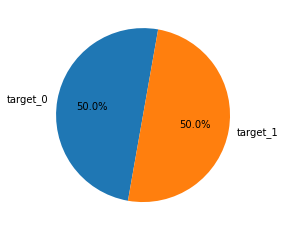

In [ ]:
only_pie_chart(new_train)

In [ ]:
new_train.to_csv("/content/drive/MyDrive/데이콘/Jobcare_data/final_new_train.csv", index=False)

In [ ]:
new_train = pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/final_new_train.csv")

In [ ]:
new_train

,person_attribute_a,contents_attribute_i,contents_attribute_a,contents_attribute_k,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l,weekend_1,weekend_2,weekend_3,weekend_4,weekend_5,weekend_6,person_attribute_a_1_1,person_attribute_a_1_2,...,person_prefer_c_4,person_prefer_c_5,person_prefer_e_1,person_prefer_e_2,person_prefer_e_3,person_prefer_e_4,person_prefer_e_5,person_prefer_e_6,person_prefer_e_7,person_prefer_e_8,person_prefer_e_9,person_prefer_e_10,person_prefer_e_11,contents_attribute_j_1_2,contents_attribute_j_1_3,contents_attribute_j_1_4,contents_attribute_j_1_5,contents_attribute_j_1_6,contents_attribute_j_1_8,contents_attribute_j_1_9,contents_attribute_j_1_10,contents_attribute_c_2,contents_attribute_c_3,contents_attribute_c_4,contents_attribute_m_2,contents_attribute_m_3,contents_attribute_m_4,contents_attribute_m_5,contents_attribute_e_1,contents_attribute_e_2,contents_attribute_e_3,contents_attribute_e_4,contents_attribute_e_5,contents_attribute_e_6,contents_attribute_e_7,contents_attribute_e_8,contents_attribute_e_9,contents_attribute_e_10,contents_attribute_e_11,target
0,1,3,3,2,0.556190,0.566065,0.566065,0.536111,0.513164,0.513957,0.524891,0.544153,0.538438,0.538438,0.526326,0.534354,0.416667,0.487569,0.487569,0.478069,0.577171,0.573100,0.511813,0.542107,0.545914,0.558835,0.503260,0.463142,0.497276,0.507087,0.509782,0.556686,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,3,3,2,0.480319,0.486509,0.505553,0.509151,0.490558,0.492380,0.506452,0.509395,0.498571,0.507336,0.505778,0.507929,0.416667,0.487569,0.487569,0.478069,0.462271,0.463041,0.459282,0.463358,0.482428,0.482428,0.465633,0.499868,0.497276,0.507087,0.509782,0.556686,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,1,3,1,2,0.516952,0.517536,0.516991,0.536111,0.545650,0.545712,0.524891,0.544153,0.527793,0.529692,0.505778,0.507929,0.416667,0.487569,0.487569,0.478069,0.498396,0.480000,0.511813,0.460341,0.499301,0.496063,0.503260,0.514862,0.497276,0.507087,0.509782,0.556686,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
3,1,3,1,2,0.469990,0.469272,0.470073,0.468319,0.469659,0.469821,0.471580,0.472232,0.472529,0.472159,0.476537,0.476396,0.452320,0.450322,0.433327,0.470988,0.498396,0.514677,0.511813,0.490099,0.536358,0.511397,0.503260,0.463142,0.505228,0.505228,0.479472,0.505199,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,1,2,3,2,0.479730,0.474880,0.470073,0.468319,0.470975,0.470975,0.470975,0.472232,0.477859,0.478895,0.475271,0.476396,0.462525,0.462525,0.462525,0.470988,0.498396,0.456965,0.511813,0.504327,0.499301,0.478526,0.503260,0.463142,0.505228,0.505228,0.479472,0.505199,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002743,1,1,3,2,0.513861,0.539136,0.520694,0.495996,0.471319,0.488164,0.492013,0.504360,0.518627,0.534527,0.507583,0.486804,0.419962,0.443324,0.469767,0.478097,0.551235,0.551873,0.529435,0.567239,0.522917,0.554897,0.484

In [ ]:
print(len(final_train.index))

501374


In [ ]:
from sklearn.model_selection import train_test_split
noise_, noise=train_test_split(new_train, test_size=0.05, random_state=42)
# 새로 만든 데이터가 50만개의 데이터인데, 여기서, 5만개의 데이터를 추출해줍니다.

In [ ]:
print(len(noise.index))

50138


In [ ]:
noise=noise.reset_index()
noise.drop('index', axis=1, inplace=True)
final_train=pd.concat([final_train, noise], axis=0)
final_train=final_train.reset_index()
final_train.drop('index', axis=1, inplace=True)

In [ ]:
final_train

,person_attribute_a,contents_attribute_i,contents_attribute_a,contents_attribute_k,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l,weekend_1,weekend_2,weekend_3,weekend_4,weekend_5,weekend_6,person_attribute_a_1_1,...,person_prefer_c_3,person_prefer_c_4,person_prefer_c_5,person_prefer_e_1,person_prefer_e_2,person_prefer_e_3,person_prefer_e_4,person_prefer_e_5,person_prefer_e_6,person_prefer_e_7,person_prefer_e_8,person_prefer_e_9,person_prefer_e_10,person_prefer_e_11,contents_attribute_j_1_2,contents_attribute_j_1_3,contents_attribute_j_1_4,contents_attribute_j_1_5,contents_attribute_j_1_6,contents_attribute_j_1_8,contents_attribute_j_1_9,contents_attribute_j_1_10,contents_attribute_c_2,contents_attribute_c_3,contents_attribute_c_4,contents_attribute_m_2,contents_attribute_m_3,contents_attribute_m_4,contents_attribute_m_5,contents_attribute_e_1,contents_attribute_e_2,contents_attribute_e_3,contents_attribute_e_4,contents_attribute_e_5,contents_attribute_e_6,contents_attribute_e_7,contents_attribute_e_8,contents_attribute_e_9,contents_attribute_e_10,contents_attribute_e_11
0,1,3,3,2,1,0.556190,0.566065,0.566065,0.536111,0.513164,0.513957,0.524891,0.544153,0.538438,0.538438,0.526326,0.534354,0.416667,0.487569,0.487569,0.478069,0.577171,0.573100,0.511813,0.542107,0.545914,0.558835,0.503260,0.463142,0.497276,0.507087,0.509782,0.556686,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,1,3,2,0,0.498492,0.506648,0.505553,0.509151,0.490558,0.492380,0.506452,0.509395,0.486493,0.492039,0.505778,0.507929,0.416667,0.487569,0.487569,0.478069,0.498396,0.511191,0.511813,0.513210,0.499301,0.496063,0.503260,0.514862,0.497276,0.507087,0.509782,0.556686,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2,3,1,1,0,0.431299,0.429925,0.449257,0.464602,0.490558,0.492380,0.506452,0.509395,0.442177,0.448325,0.447911,0.469244,0.532427,0.545923,0.560124,0.557058,0.472340,0.463632,0.456585,0.487692,0.461963,0.470246,0.471039,0.460674,0.496201,0.497187,0.595214,0.556686,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2,1,3,2,0,0.583898,0.583898,0.577104,0.524827,0.570333,0.570333,0.567296,0.517324,0.582963,0.582963,0.577147,0.515115,0.416667,0.487569,0.487569,0.478069,0.462271,0.463041,0.459282,0.463358,0.482428,0.482428,0.465633,0.499868,0.497276,0.507087,0.509782,0.556686,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
4,1,1,1,2,0,0.556190,0.566065,0.566065,0.536111,0.513164,0.513957,0.524891,0.544153,0.538438,0.538438,0.526326,0.534354,0.416667,0.487569,0.487569,0.478069,0.445570,0.443114,0.446149,0.446087,0.445809,0.451369,0.465633,0.499868,0.497276,0.507087,0.509782,0.556686,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551507,1,1,1,2,1,0.498526,0.506670,0.505583,0.509177,0.490564,0.492384,0.506483,0.509422,0.486522,0.492060,0.505834,0.507982,0.586218,0.584822,0.559977,0.556915,0.498420,0.508966,0.511859,0.512273,0.499301,0.500632,0.503391,

In [ ]:
print(len(final_train.index))

551512


AutoML(+Noise Data)
--

In [ ]:
automl=AutoML(total_time_limit=18000, mode="Compete", ml_task='regression', eval_metric='rmse',
              algorithms=['Random Forest','Extra Trees','LightGBM','Xgboost','CatBoost'],
              validation_strategy={"validation_type":"kfold", "k_folds":10, "shuffle":True,
                                   "stratify":True, "random_seed":1234},
              boost_on_errors=True, kmeans_features=True)

In [ ]:
x=final_train.drop('target',axis=1)
y=final_train['target']

In [ ]:
automl.fit(x,y)

AutoML directory: AutoML_1
The task is regression with evaluation metric rmse
AutoML will use algorithms: ['Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'kmeans_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 5 models
1_Default_LightGBM rmse 0.482385 trained in 515.21 seconds
2_Default_Xgboost rmse 0.481927 trained in 908.54 seconds
3_Default_CatBoost rmse 0.481465 trained in 899.35 seconds
4_Default_RandomForest rmse 0.493259 trained in 2044.2 seconds
* Step not_so_random will try to check up to 45 models
14_LightGBM rmse 0.481705 trained in 1065.1 seconds
5_Xgboost rmse 0.48274 trained in 572.5

AutoML(algorithms=['Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost',
                   'CatBoost'],
       boost_on_errors=True, eval_metric='rmse', kmeans_features=True,
       ml_task='regression', mode='Compete', total_time_limit=18000,
       validation_strategy={'k_folds': 10, 'random_seed': 1234, 'shuffle': True,
                            'stratify': True, 'validation_type': 'kfold'})

In [ ]:
automl.report()

In [ ]:
final_test_t=final_test.dropna(axis=0)

In [ ]:
print(len(final_test.index))
print(len(final_test_t.index))

46404
46392


In [ ]:
sub_1=pd.read_csv("/content/drive/MyDrive/데이콘/Jobcare_data/sample_submission.csv")

In [ ]:
print(len(sub_1.index))

46404


In [ ]:
final_test_a=final_test.fillna(0)

In [ ]:
pred=automl.predict(final_test_a)

In [ ]:
df_pred=pd.DataFrame(pred, columns=['target'])
df_pred['target']=df_pred['target'].apply(lambda x:1 if x>=0.35 else 0)

In [ ]:
sub=sub_1.drop('target',axis=1)
sub_mljar_f=pd.concat([sub, df_pred], axis=1)

In [ ]:
def only_pie_chart(df):
  zero=len(df.loc[df['target']==0].index)
  one=len(df.loc[df['target']==1].index)
  ratio=[zero, one]
  labels=['target_0', 'target_1']
  plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False)
  plt.show()

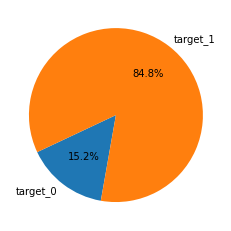

In [ ]:
only_pie_chart(sub_mljar_f)

In [ ]:
sub_mljar_f['target'].value_counts()

1    39341
0     7063
Name: target, dtype: int64

In [ ]:
sub_mljar_f.to_csv("/content/drive/MyDrive/데이콘/Jobcare_data/sub_mljar_real_final.csv", index=False)

In [ ]:
sub_mljar_f.to_csv('sub_mljar_real_final.csv', index=False)

In [ ]:
sub_mljar_f

,id,target
0,0,1
1,1,1
2,2,1
3,3,0
4,4,1
...,...,...
46399,46399,1
46400,46400,1
46401,46401,1
46402,46402,1
